# データ分析の事前準備

ここではSIGNATEの[【練習問題】お弁当の需要予測データ](https://signate.jp/competitions/24/data)を使用している

## よく使うPythonのライブラリ

#### numpy

* 演算用ライブラリ
* 行列の形式で演算できるため処理速度が早い
* numpyの形式が他の機械学習用ライブラリの前提になっている場合もある

#### matplotlib

* データを可視化するためのライブラリ

#### pandas

* データ前処理用のライブラリ
* データのラベル付けや不要列の削除などに用いる

#### 一般的な処理の流れ

1. pandasで前処理
2. numpyで演算
3. matplotlibで可視化

## データを読み込む

ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
%matplotlib inline

CSVデータの読み込み

In [2]:
train = pd.read_csv('train.csv')

## データの概要を見る

行数と列数を見る

In [3]:
train.shape

(207, 12)

先頭5行を見る

In [4]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


最終5行を見る

In [5]:
train.tail()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


## データの詳細を見る

基本統計量を見る

In [6]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


データの型を見る

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


特定の列に絞って見る

In [8]:
train[['y','week']]

,y,week
0,90,月
1,101,火
2,118,水
3,120,木
4,130,金
...,...,...
202,59,水
203,50,木
204,45,金
205,56,月


特定の列の平均値を見る

In [9]:
train['y'].mean()

86.6231884057971

特定の列の中央値を見る

In [10]:
train['y'].median()

78.0

特定の列の値のユニーク数を見る

In [11]:
train['name'].value_counts()

メンチカツ            6
タンドリーチキン         6
手作りロースカツ         5
鶏の唐揚げおろしソース      4
回鍋肉              4
                ..
白身魚唐揚げ野菜あんかけ     1
ポークハヤシ           1
酢豚orカレー          1
ハンバーグ和風きのこソース    1
鶏肉とカシューナッツ炒め     1
Name: name, Length: 156, dtype: int64

特定の列の条件に合致する行だけ見る

In [12]:
train[train['y']>=150]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
10,2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
11,2013-12-3,153,火,1,厚揚げ豚生姜炒め,NaN,NaN,NaN,NaN,快晴,--,13.9
12,2013-12-4,151,水,1,クリームチーズ入りメンチ,NaN,NaN,NaN,NaN,晴れ,--,13.5
13,2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8
15,2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
16,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1
17,2013-12-11,157,水,0,五目御飯,NaN,NaN,NaN,NaN,曇,--,11.0
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
23,2013-12-19,151,木,0,ポーク味噌焼き,NaN,NaN,NaN,NaN,雨,0.5,6.8


In [13]:
train[train['week']=='月']

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
10,2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
15,2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
36,2014-1-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,NaN,晴れ,--,6.5
41,2014-1-27,126,月,1,チンジャオロース,415.0,NaN,NaN,NaN,快晴,--,5.1
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9
51,2014-2-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
55,2014-2-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6


特定の列の条件に合致した行の平均値を見る

In [14]:
train[train['week']=='月']['y'].mean()

94.05128205128206

## 折れ線グラフにして見る

グラフを描く

<Axes: >

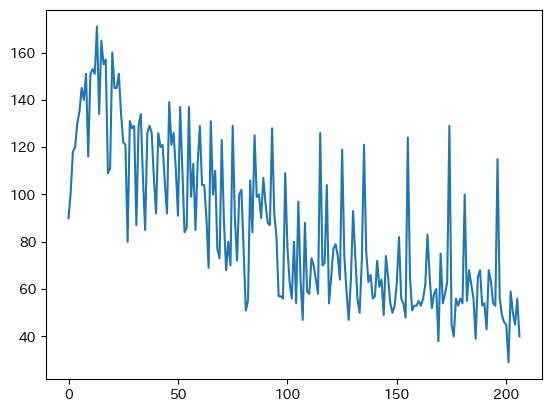

In [15]:
train['y'].plot()

グラフの大きさを変える

<Axes: >

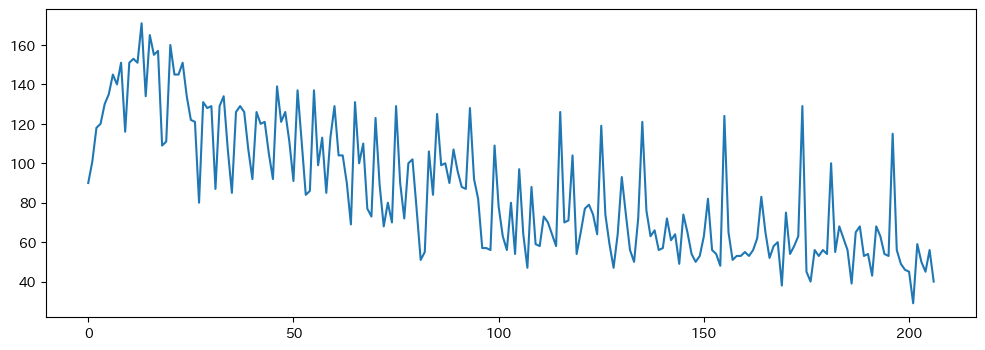

In [16]:
train['y'].plot(figsize=(12,4))

グラフと軸に名前を付ける

Text(0, 0.5, 'temperature')

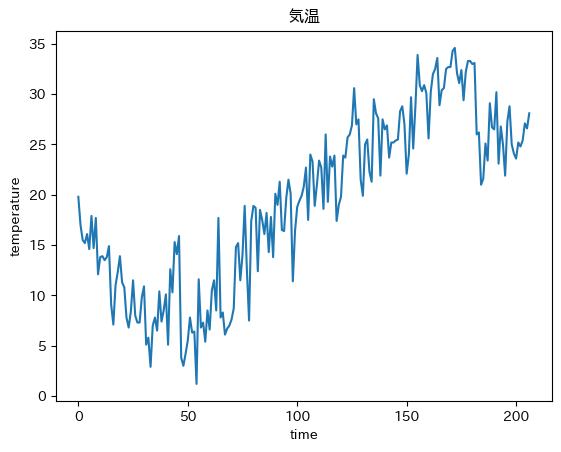

In [17]:
ax = train['temperature'].plot(title='気温')
ax.set_xlabel('time')
ax.set_ylabel('temperature')

## ヒストグラムにして見る

グラフを描く

<Axes: ylabel='Frequency'>

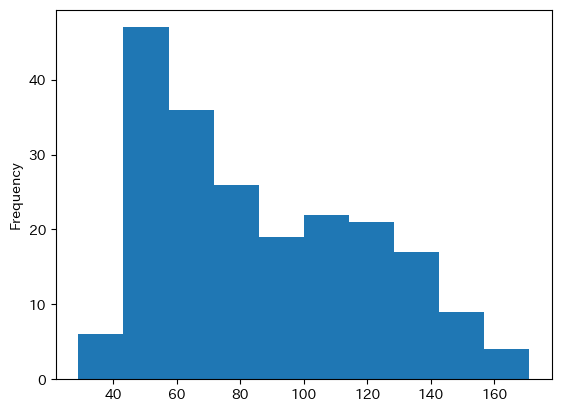

In [18]:
train['y'].plot.hist()

グリッド線を引く

<Axes: ylabel='Frequency'>

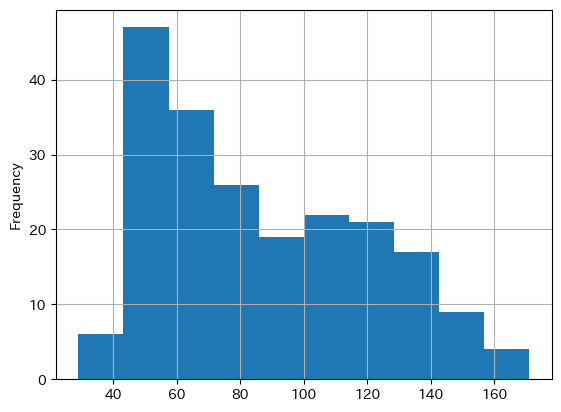

In [19]:
train['y'].plot.hist(grid=True)

平均値を表す赤線を描く

<Axes: ylabel='Frequency'>

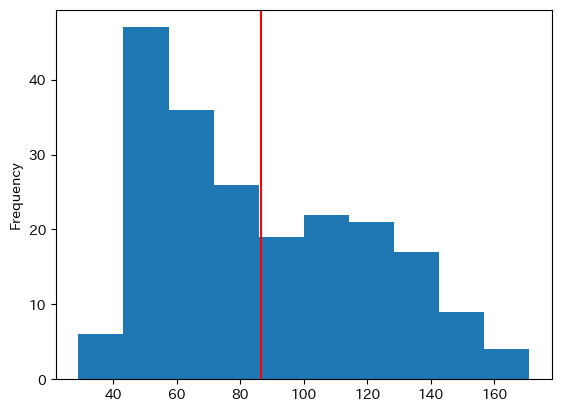

In [20]:
plt.axvline(x=train['y'].mean(),color='red')
train['y'].plot.hist()

大きさを変えて画像データとして出力する

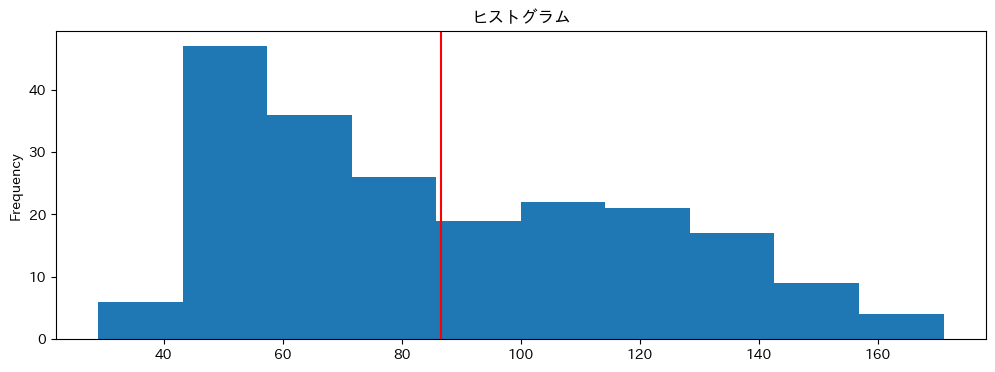

In [21]:
plt.axvline(x=train['y'].mean(),color='red')
train['y'].plot.hist(figsize=(12,4),title='ヒストグラム')
plt.savefig('sample_fig.png')

## 欠損値を確かめる

欠損値が含まれているか確かめる

In [22]:
train.isnull()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,False,False,False,False,False,True,True,True,True,False,False,False
1,False,False,False,False,False,True,True,True,True,False,False,False
2,False,False,False,False,False,True,True,True,True,False,False,False
3,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,True,True,True,False,False,False
203,False,False,False,False,False,False,True,True,True,False,False,False
204,False,False,False,False,False,True,False,False,True,False,False,False
205,False,False,False,False,False,False,True,True,True,False,False,False


欠損値が含まれている列を表示する

In [23]:
train.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks           True
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

欠損値の全体量を見て、行・列どちらで削除すべきか確認する

In [24]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

## 欠損値を処理する

欠損値を0で補間する

In [25]:
train.fillna(0)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,0,0,0.0,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,0,0,0.0,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,0.0,スペシャルメニュー（800円）,キャリアアップ支援セミナー,0.0,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,0,0,0.0,快晴,--,26.6


欠損値を含む行を削除する

※ここでは全行が対象になってしまう

In [26]:
train.dropna()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature


特定の列に欠損値があった場合その行を削除する

In [27]:
train.dropna(subset=['kcal'])

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
28,2014-1-7,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
30,2014-1-9,129,木,1,鶏チリソース,435.0,NaN,NaN,NaN,曇,--,10.9
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
32,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


平均値で欠損値を補間する

In [28]:
avg = train['kcal'].mean()
train['kcal'].fillna(avg)

0      404.409639
1      404.409639
2      404.409639
3      404.409639
4      404.409639
          ...    
202    408.000000
203    394.000000
204    404.409639
205    404.000000
206    398.000000
Name: kcal, Length: 207, dtype: float64

## 相関係数を調べる

指定した2つの列の相関係数を調べる

In [29]:
train[['y','temperature']].corr()

,y,temperature
y,1.000000,-0.655332
temperature,-0.655332,1.000000


## 散布図で確かめる

指定した2つの列の散布図を描く

<Axes: xlabel='temperature', ylabel='y'>

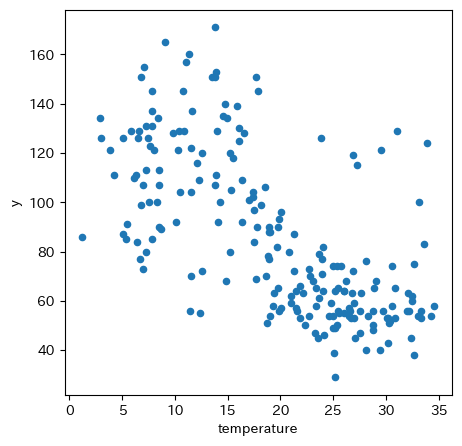

In [30]:
train.plot.scatter(x='temperature',y='y',figsize=(5,5))